In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle
from tqdm import tqdm

from path_explain.path_explainer_tf import PathExplainerTF
from path_explain import utils
from plot.text import text_plot
from train import load_data, cnn_model

In [2]:
utils.set_up_environment(visible_devices='0')

In [3]:
x_train, y_train, x_test, y_test, vocabulary_inv = load_data(20000, 400)

In [4]:
def convert_encoded(sentence):
    return [vocabulary_inv[word] for word in sentence[1:] if word != 0]
def strip_attributions(attribution, sentence):
    non_zero_mask = sentence != 0
    non_zero_mask[0] = False
    attribution = attribution[non_zero_mask]
    return attribution

In [5]:
model = tf.keras.models.load_model('cnn.h5')

In [6]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 5s 184us/sample - loss: 0.3000 - binary_accuracy: 0.8709 - auc: 0.9507


[0.3000157403469086, 0.87088, 0.9506597]

In [6]:
lengths = np.sum(x_test != 0, axis=1)
min_indices = np.argsort(lengths)
batch_input = x_test[min_indices[:16]]
batch_pred = model(batch_input)

In [7]:
embedding_attributions = np.load('embedding_attributions_cnn.npy')
interaction_matrix = np.load('interaction_matrix_cnn.npy')

In [18]:
word_attributions = np.sum(embedding_attributions, axis=-1)
word_interactions = np.sum(interaction_matrix, axis=(2, 4))
word_interactions = word_interactions[:, :, :35]

In [12]:
batch_input_text = [list(sentence[sentence != 0]) for sentence in batch_input]
batch_input_text = [convert_encoded(sentence) for sentence in batch_input_text]

In [13]:
for i in range(16):
    print(str(i) + ')\t[{}, {:.4f}]\t'.format('positive' if y_test[min_indices[i]] == 1 else 'negative', batch_pred[i, 0]) + \
          ' '.join(batch_input_text[i]))

0)	[negative, 0.2812]	primary plot primary direction poor interpretation
1)	[negative, 0.5089]	read the book forget the movie
2)	[negative, 0.7396]	more suspenseful more subtle much much more disturbing
3)	[negative, 0.3076]	what a script what a story what a mess
4)	[positive, 0.7705]	brilliant and moving performances by tom and peter finch
5)	[negative, 0.4039]	i hope this group of film makers never re <UNKNOWN/>
6)	[positive, 0.7602]	just love the interplay between two great characters of stage screen veidt barrymore
7)	[positive, 0.5412]	this is a great movie too bad it is not available on home video
8)	[positive, 0.8099]	without a doubt one of tobe best epic great special effects and the vamp me baby
9)	[positive, 0.8285]	a mesmerizing film that certainly keeps your attention ben daniels is fascinating and courageous to watch
10)	[positive, 0.8792]	absolutely fantastic whatever i say wouldn't do this underrated movie the justice it deserves watch it now fantastic
11)	[positive, 0.8

In [22]:
def plot_interactions(word_array,
                      interactions,
                      include_legend=False,
                      vmin=None,
                      vmax=None,
                      **kwargs):
    num_words = len(word_array)
    interactions = interactions[:num_words, :num_words]
    for i in range(num_words):
        select_interactions = interactions[i]
        select_interactions[i] = 0.0
        text_plot(word_array, select_interactions, include_legend, vmin=vmin, vmax=vmax, fontsize=20)

In [25]:
def plot_all(i):
    text_plot(batch_input_text[i], strip_attributions(word_attributions[i], batch_input[i]), include_legend=True, fontsize=20)

    indices = np.where(~np.eye(word_interactions[i].shape[0], dtype=bool))
    bounds = np.max(np.abs(word_interactions[i][indices]))
    plot_interactions(batch_input_text[i], word_interactions[i], vmin=-bounds, vmax=bounds, fontsize=20)

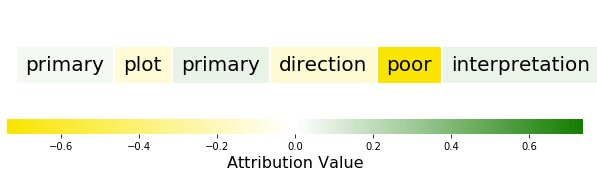

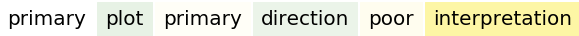

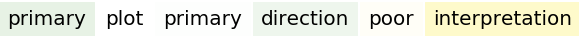

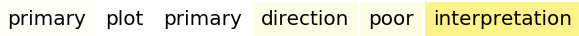

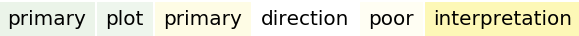

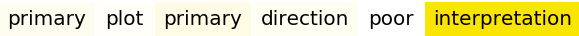

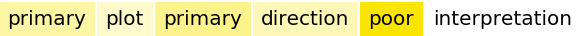

In [26]:
plot_all(0)

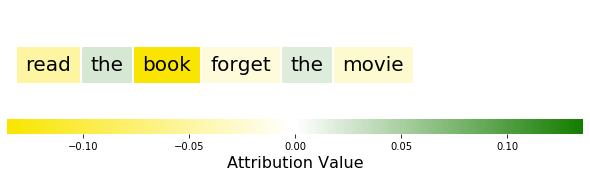

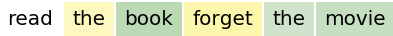

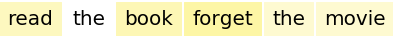

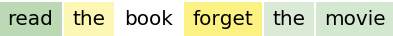

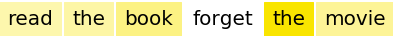

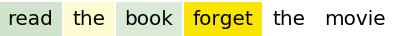

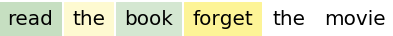

In [27]:
plot_all(1)

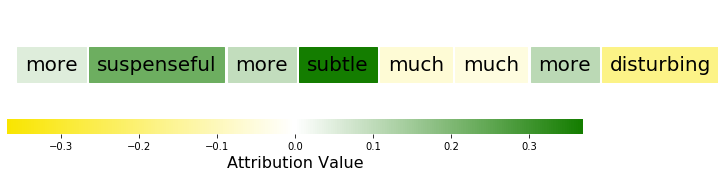

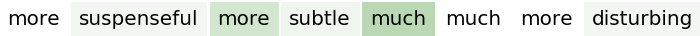

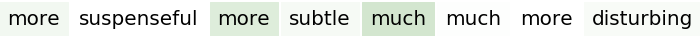

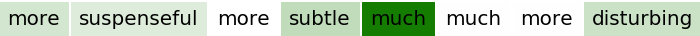

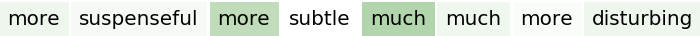

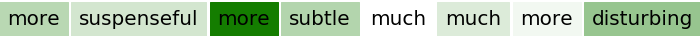

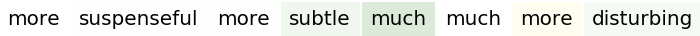

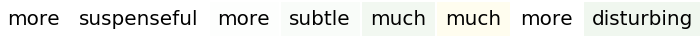

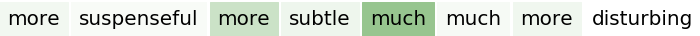

In [28]:
plot_all(2)

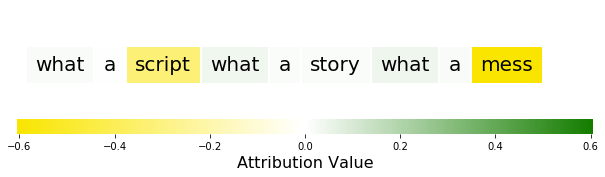

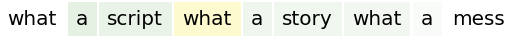

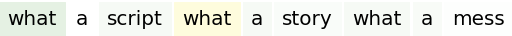

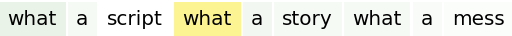

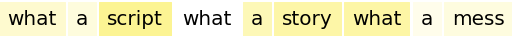

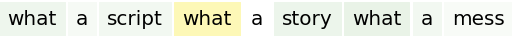

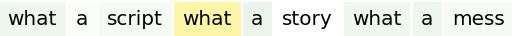

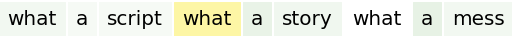

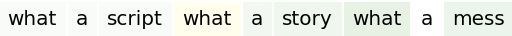

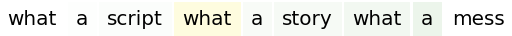

In [29]:
plot_all(3)

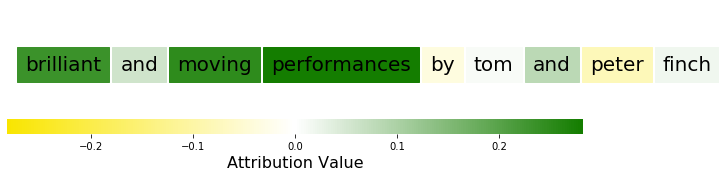

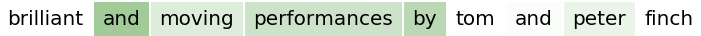

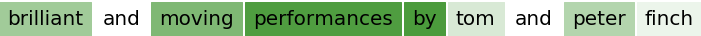

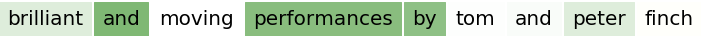

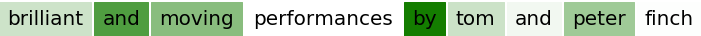

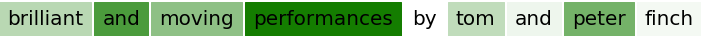

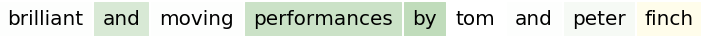

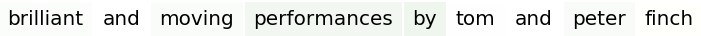

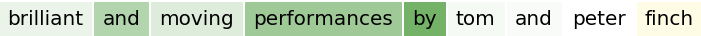

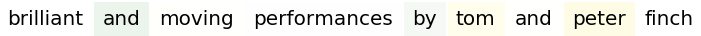

In [30]:
plot_all(4)

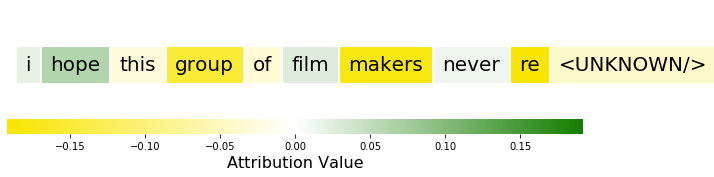

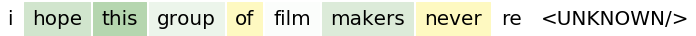

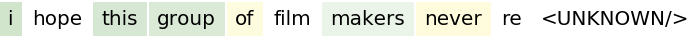

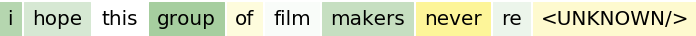

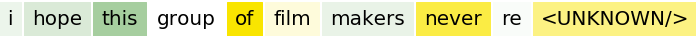

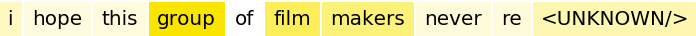

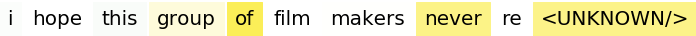

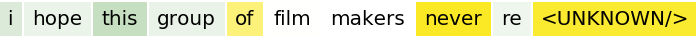

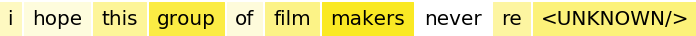

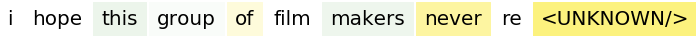

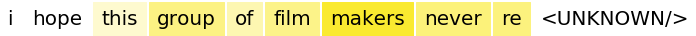

In [31]:
plot_all(5)

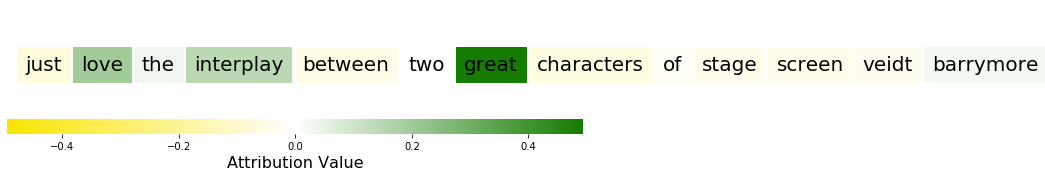

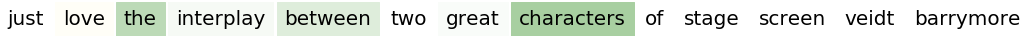

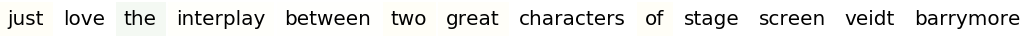

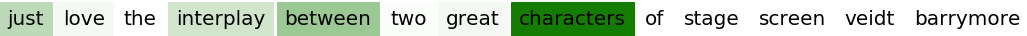

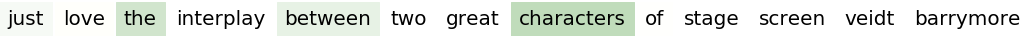

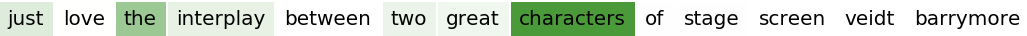

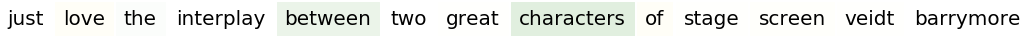

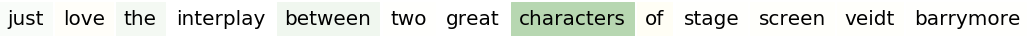

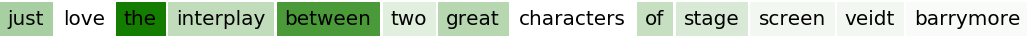

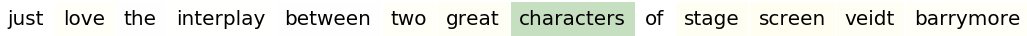

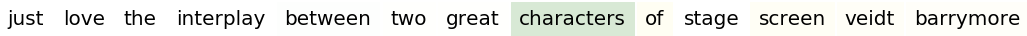

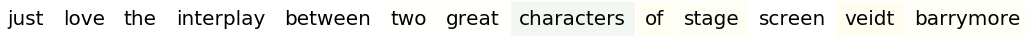

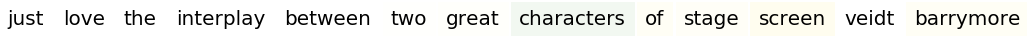

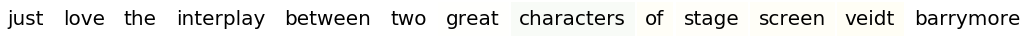

In [32]:
plot_all(6)

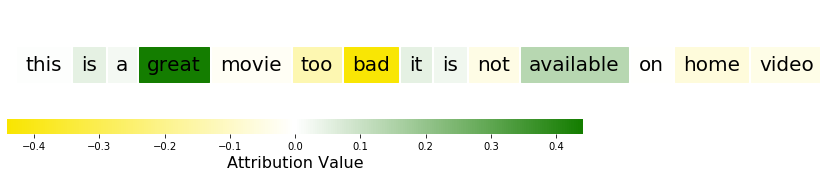

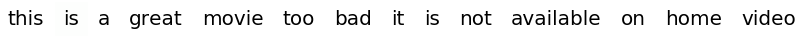

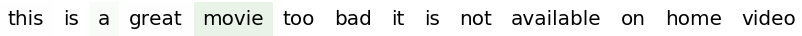

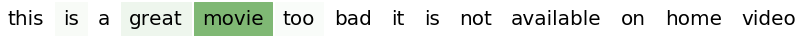

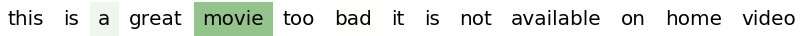

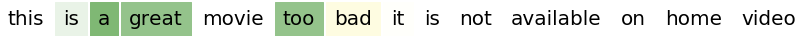

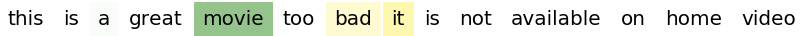

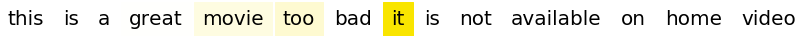

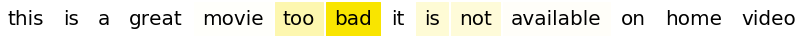

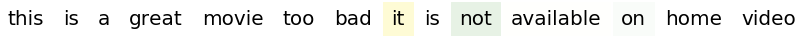

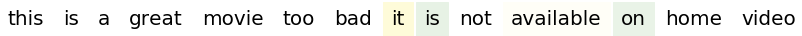

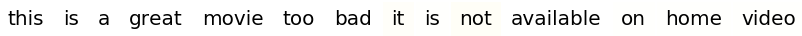

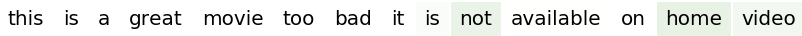

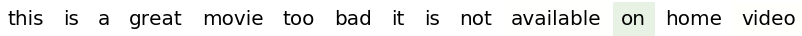

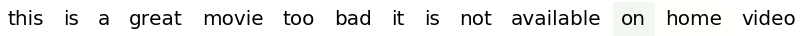

In [53]:
plot_all(7)

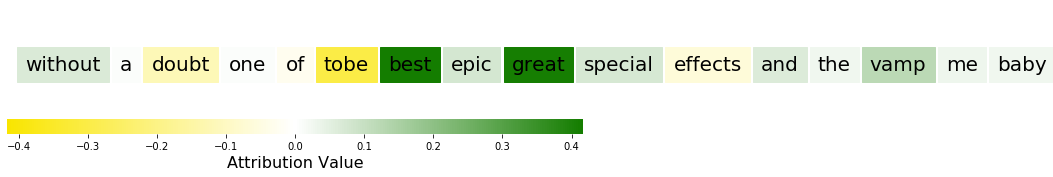

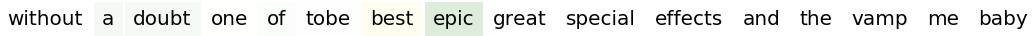

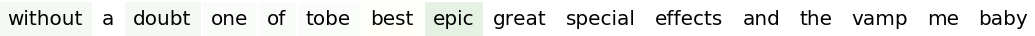

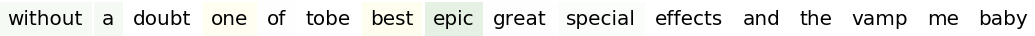

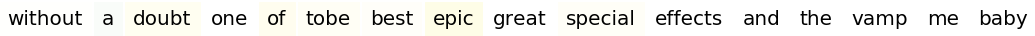

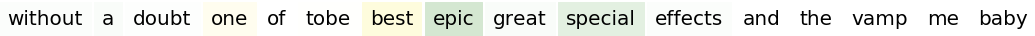

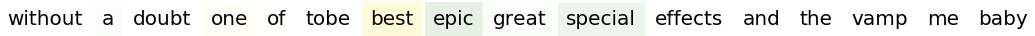

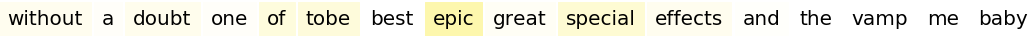

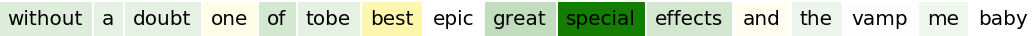

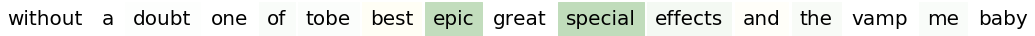

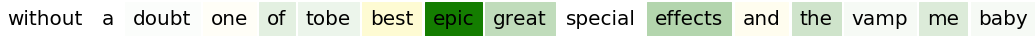

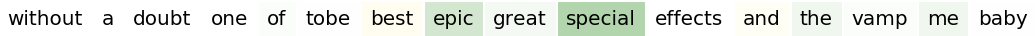

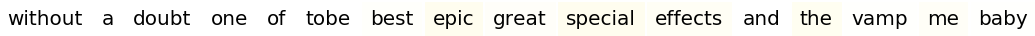

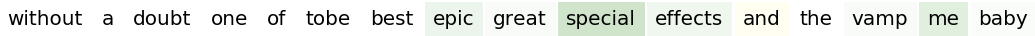

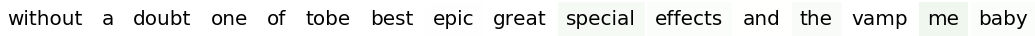

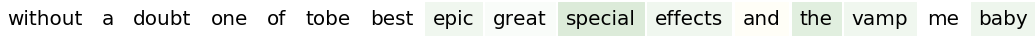

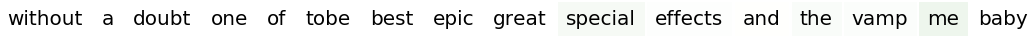

In [33]:
plot_all(8)

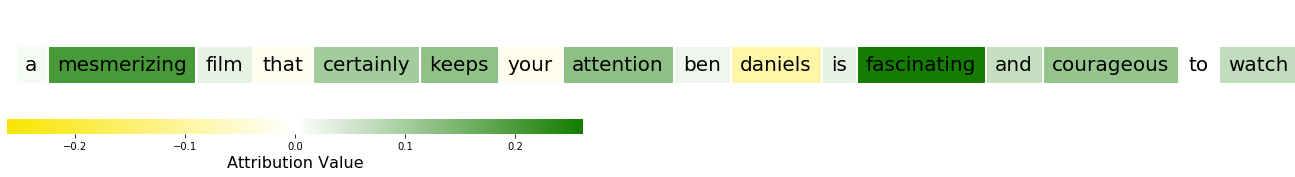

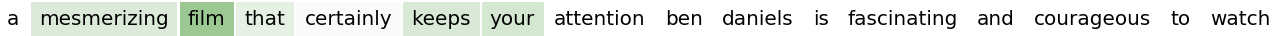

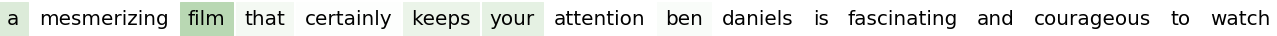

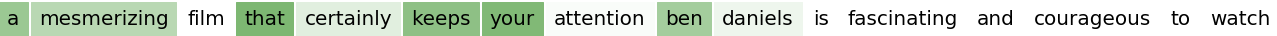

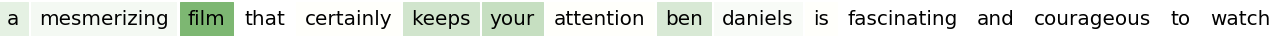

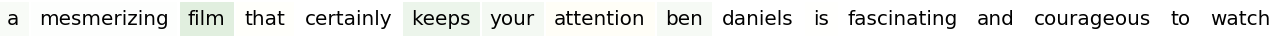

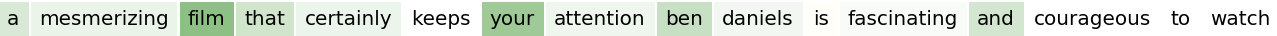

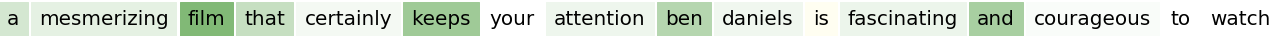

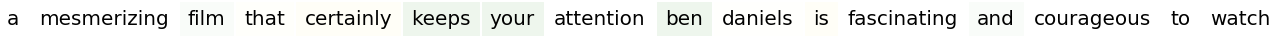

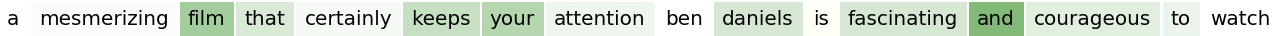

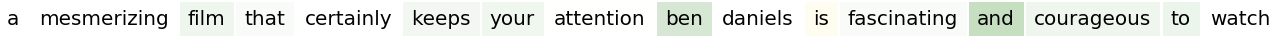

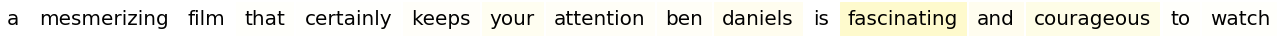

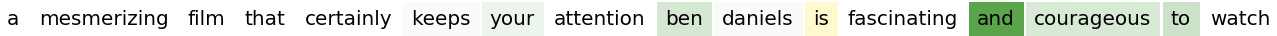

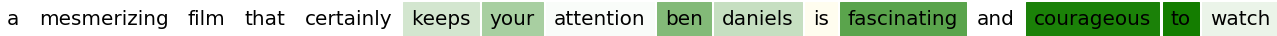

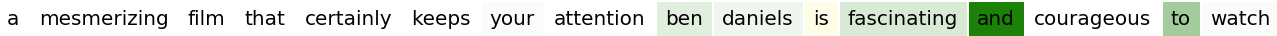

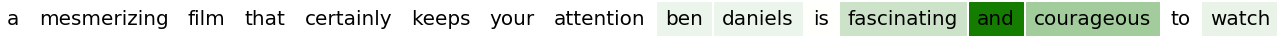

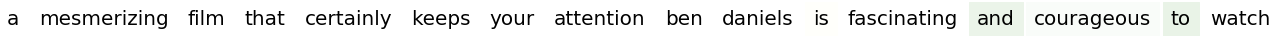

In [34]:
plot_all(9)

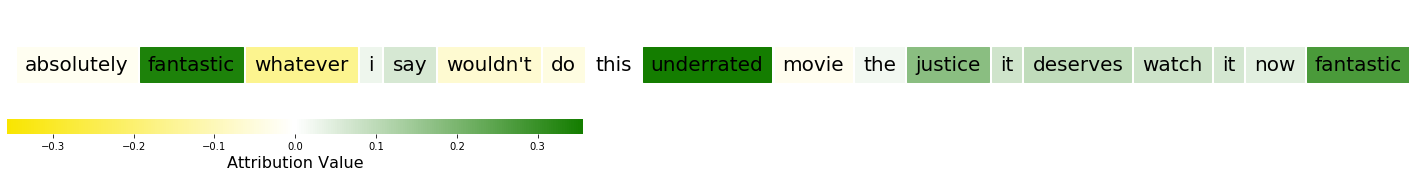

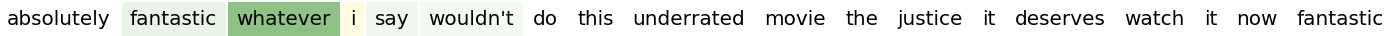

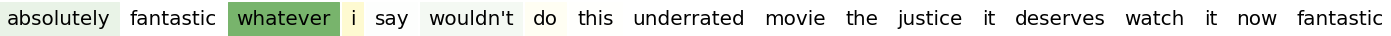

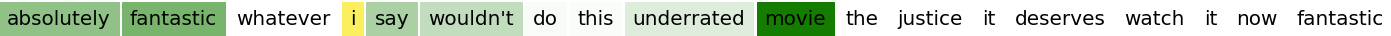

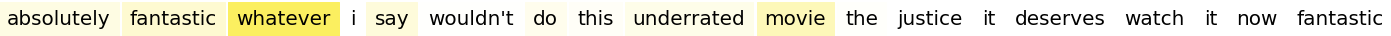

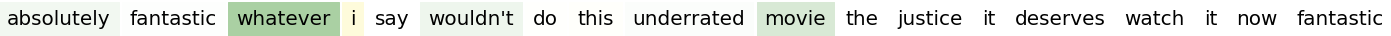

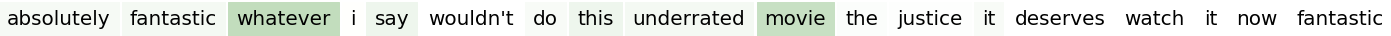

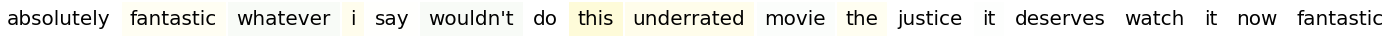

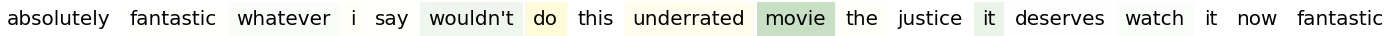

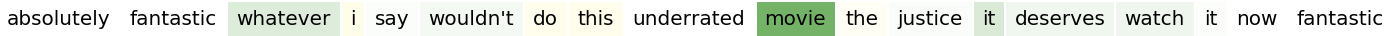

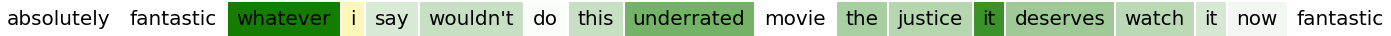

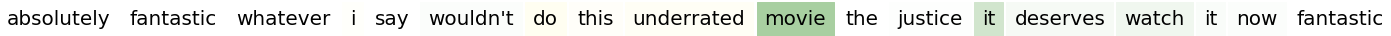

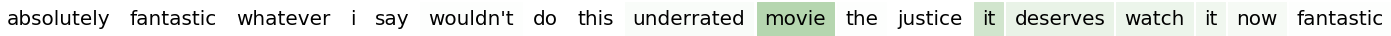

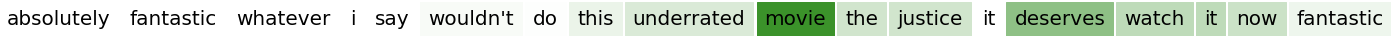

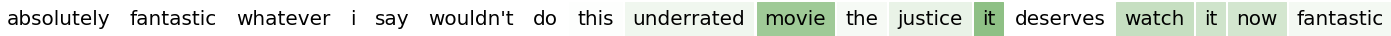

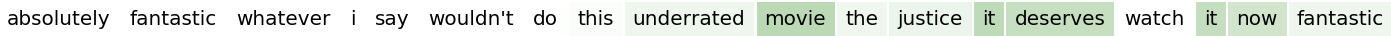

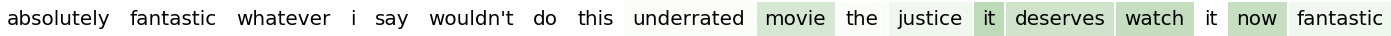

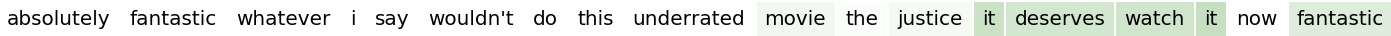

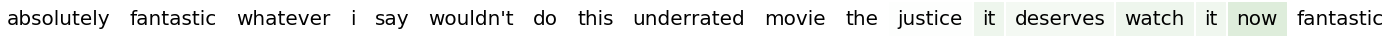

In [35]:
plot_all(10)

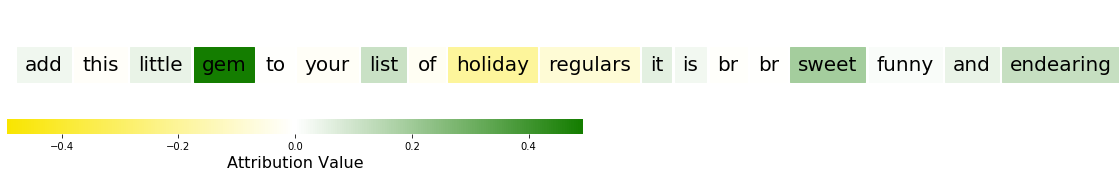

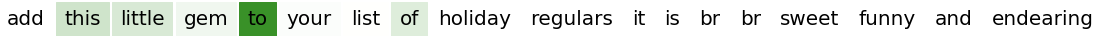

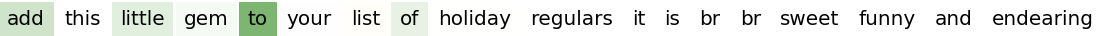

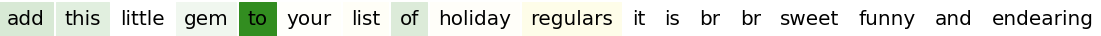

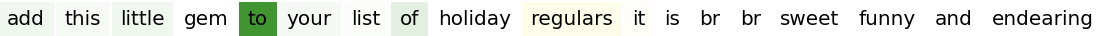

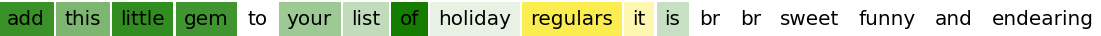

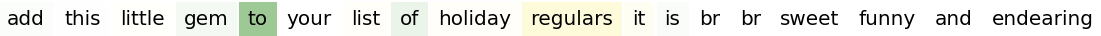

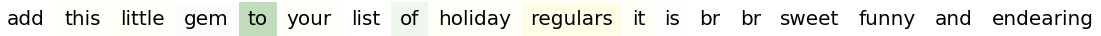

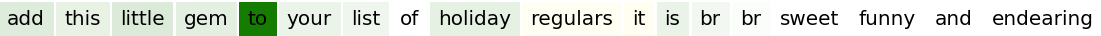

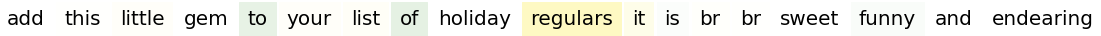

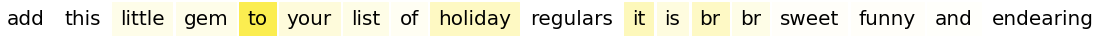

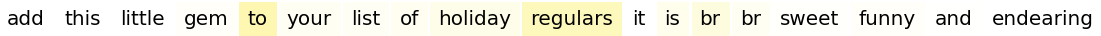

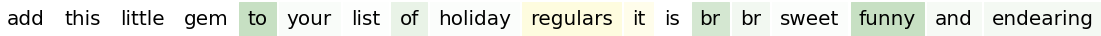

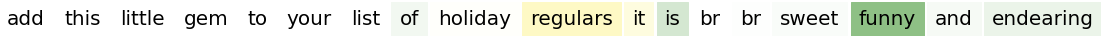

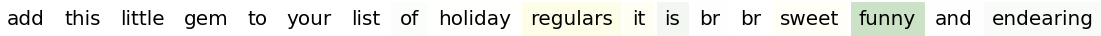

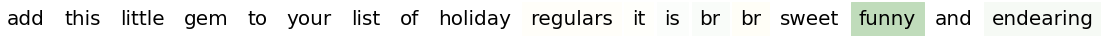

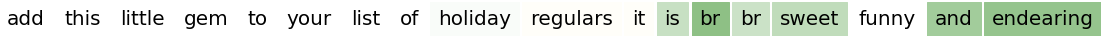

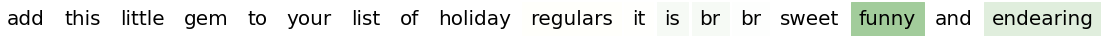

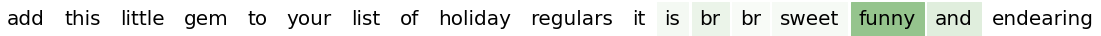

In [36]:
plot_all(11)

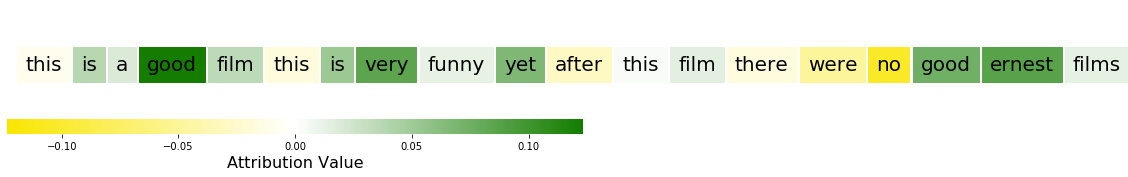

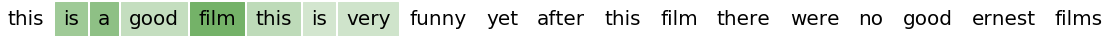

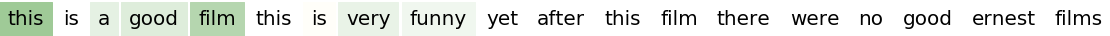

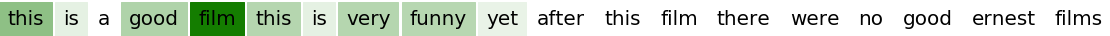

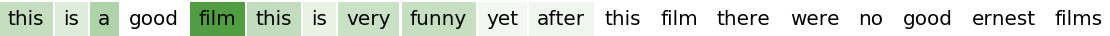

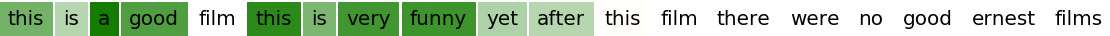

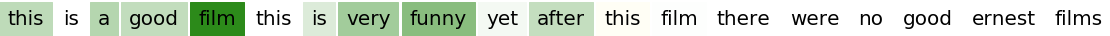

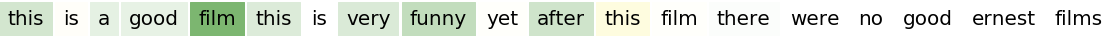

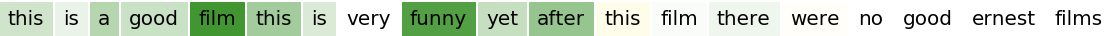

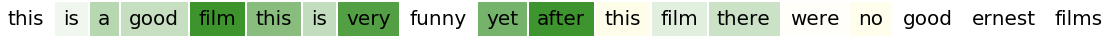

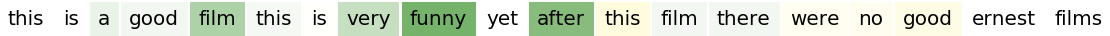

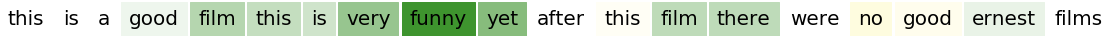

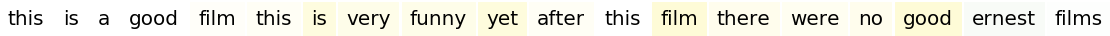

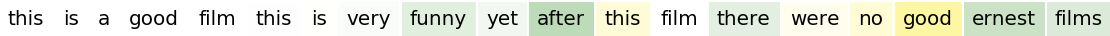

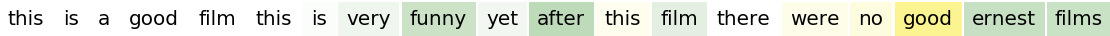

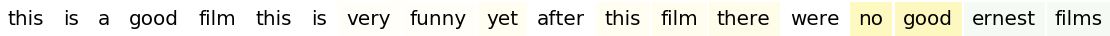

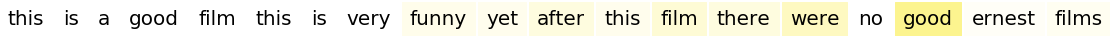

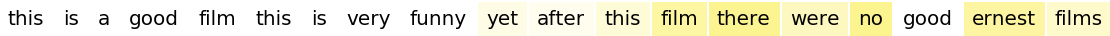

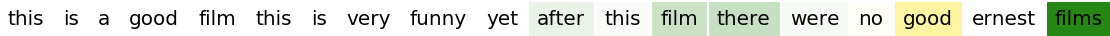

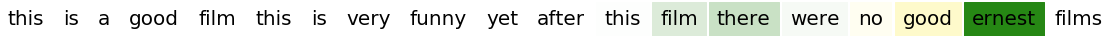

In [37]:
plot_all(12)

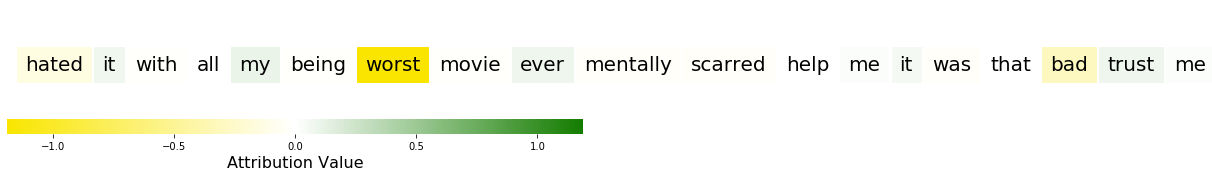

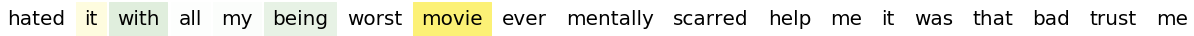

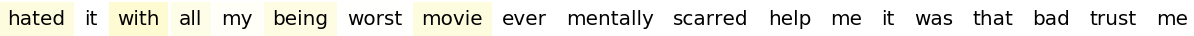

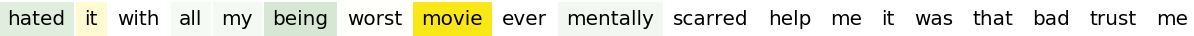

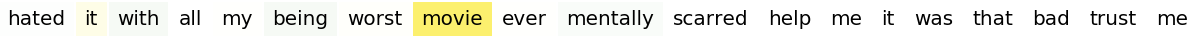

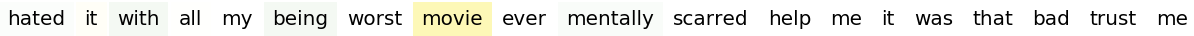

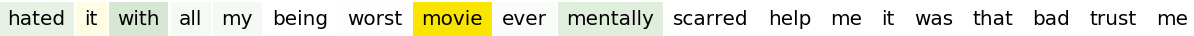

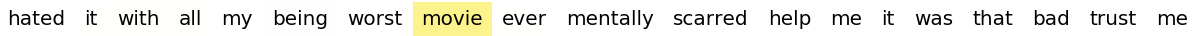

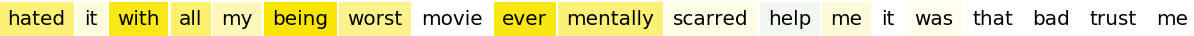

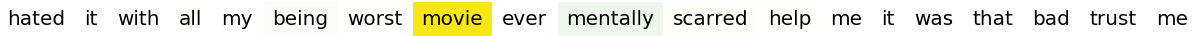

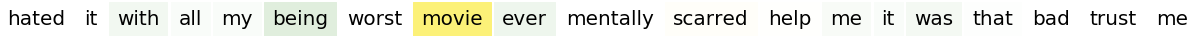

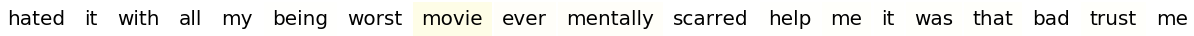

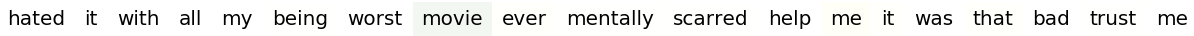

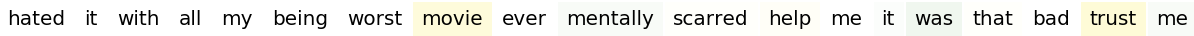

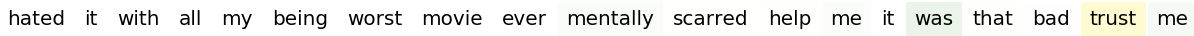

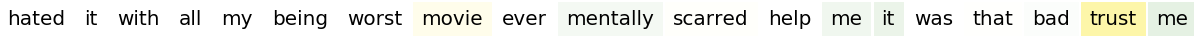

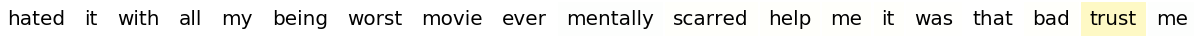

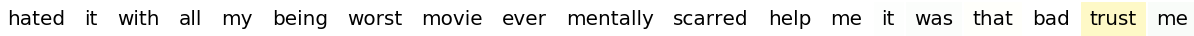

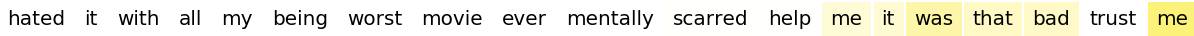

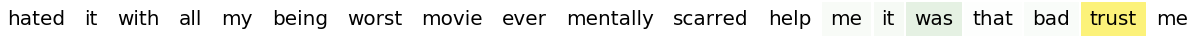

In [38]:
plot_all(13)

/homes/gws/psturm/expected_hessians/plot/text.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


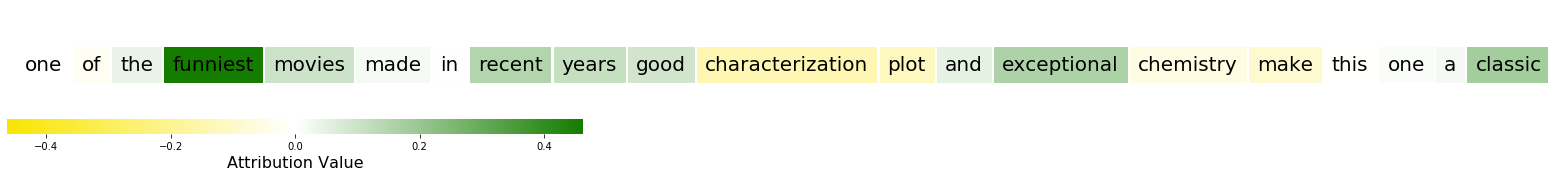

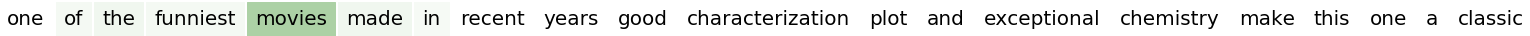

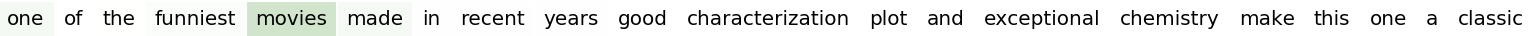

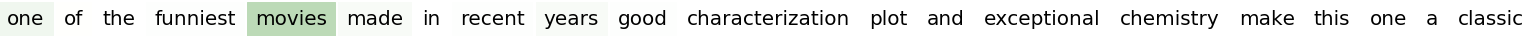

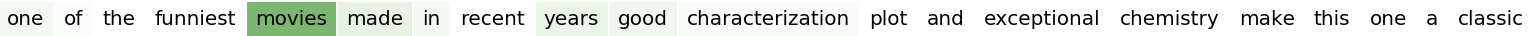

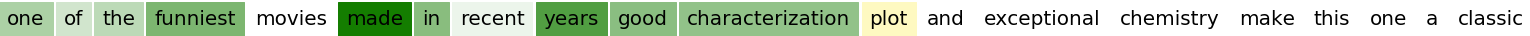

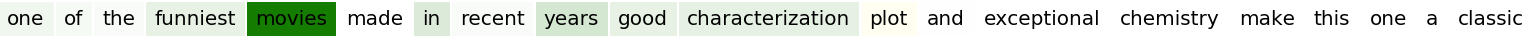

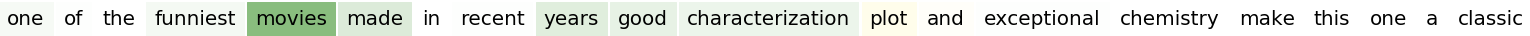

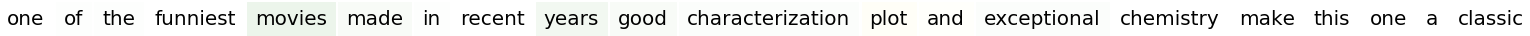

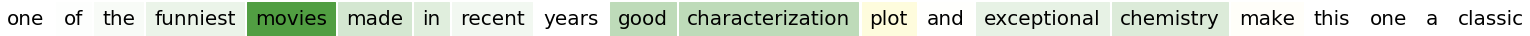

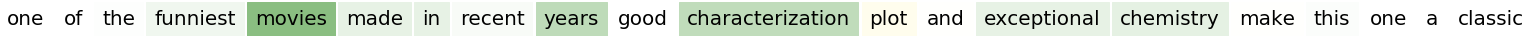

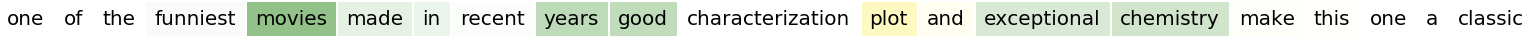

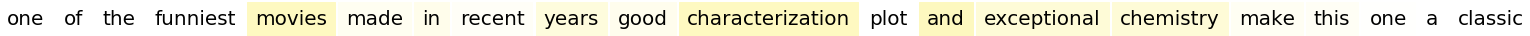

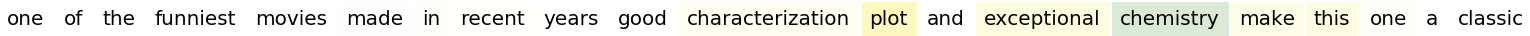

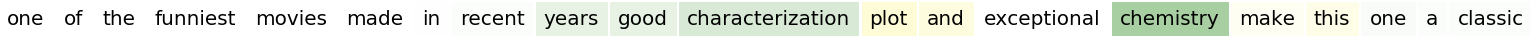

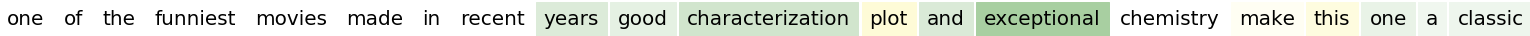

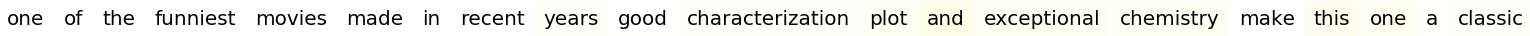

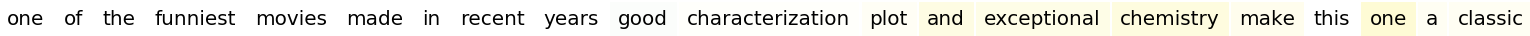

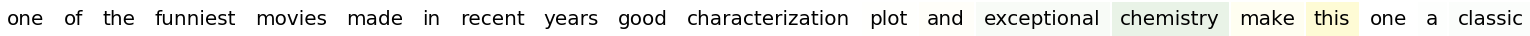

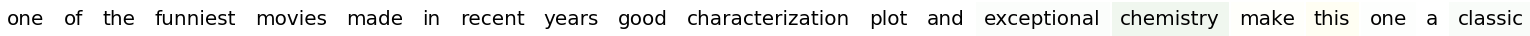

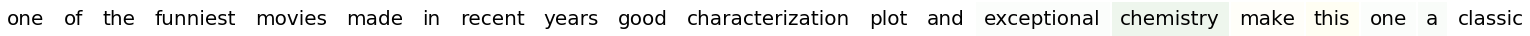

In [39]:
plot_all(14)

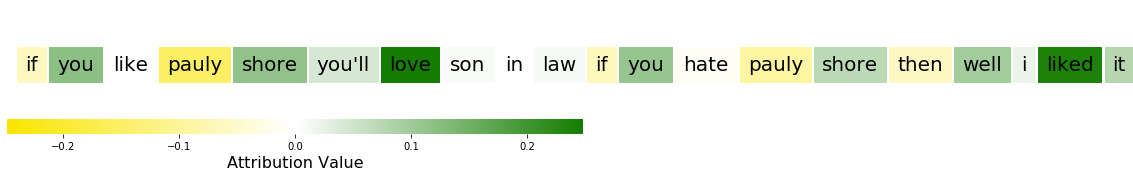

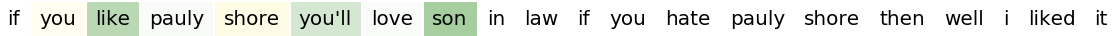

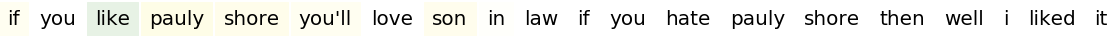

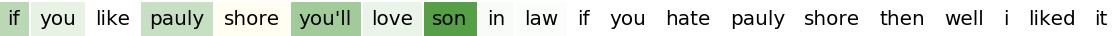

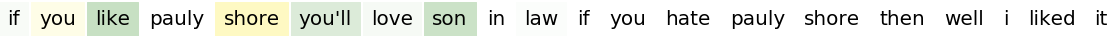

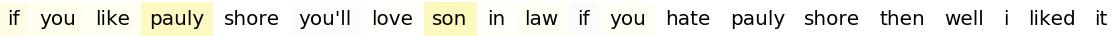

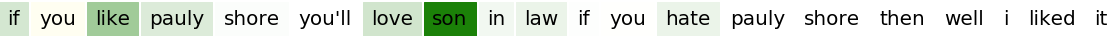

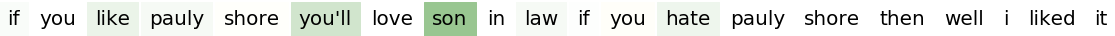

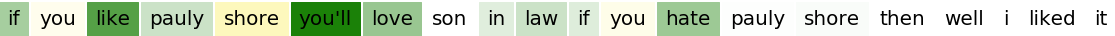

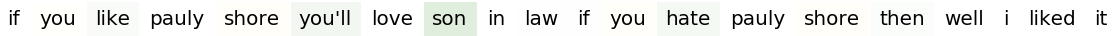

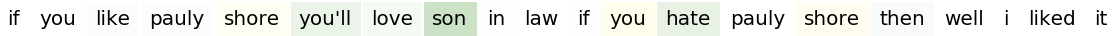

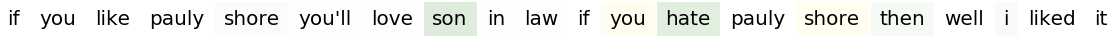

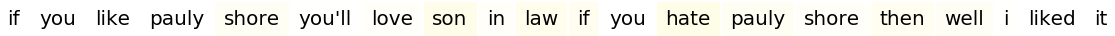

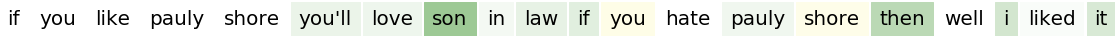

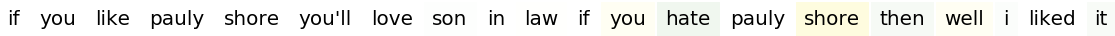

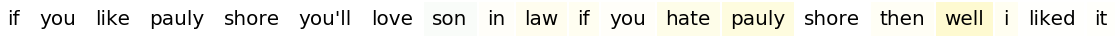

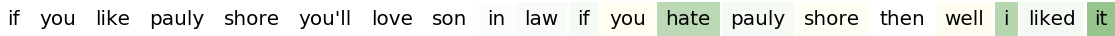

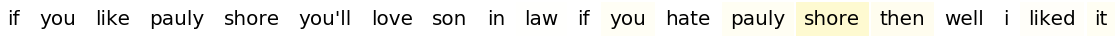

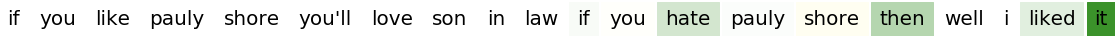

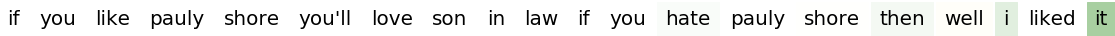

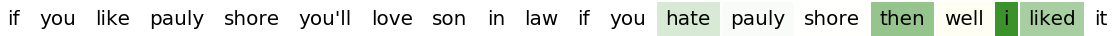

In [40]:
plot_all(15)